In [37]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest,f_oneway,chi2_contingency
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [38]:
df = pd.read_csv("dataset.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Vérifiez les informations manquantes et les doublons (missingno)

In [39]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<AxesSubplot:>

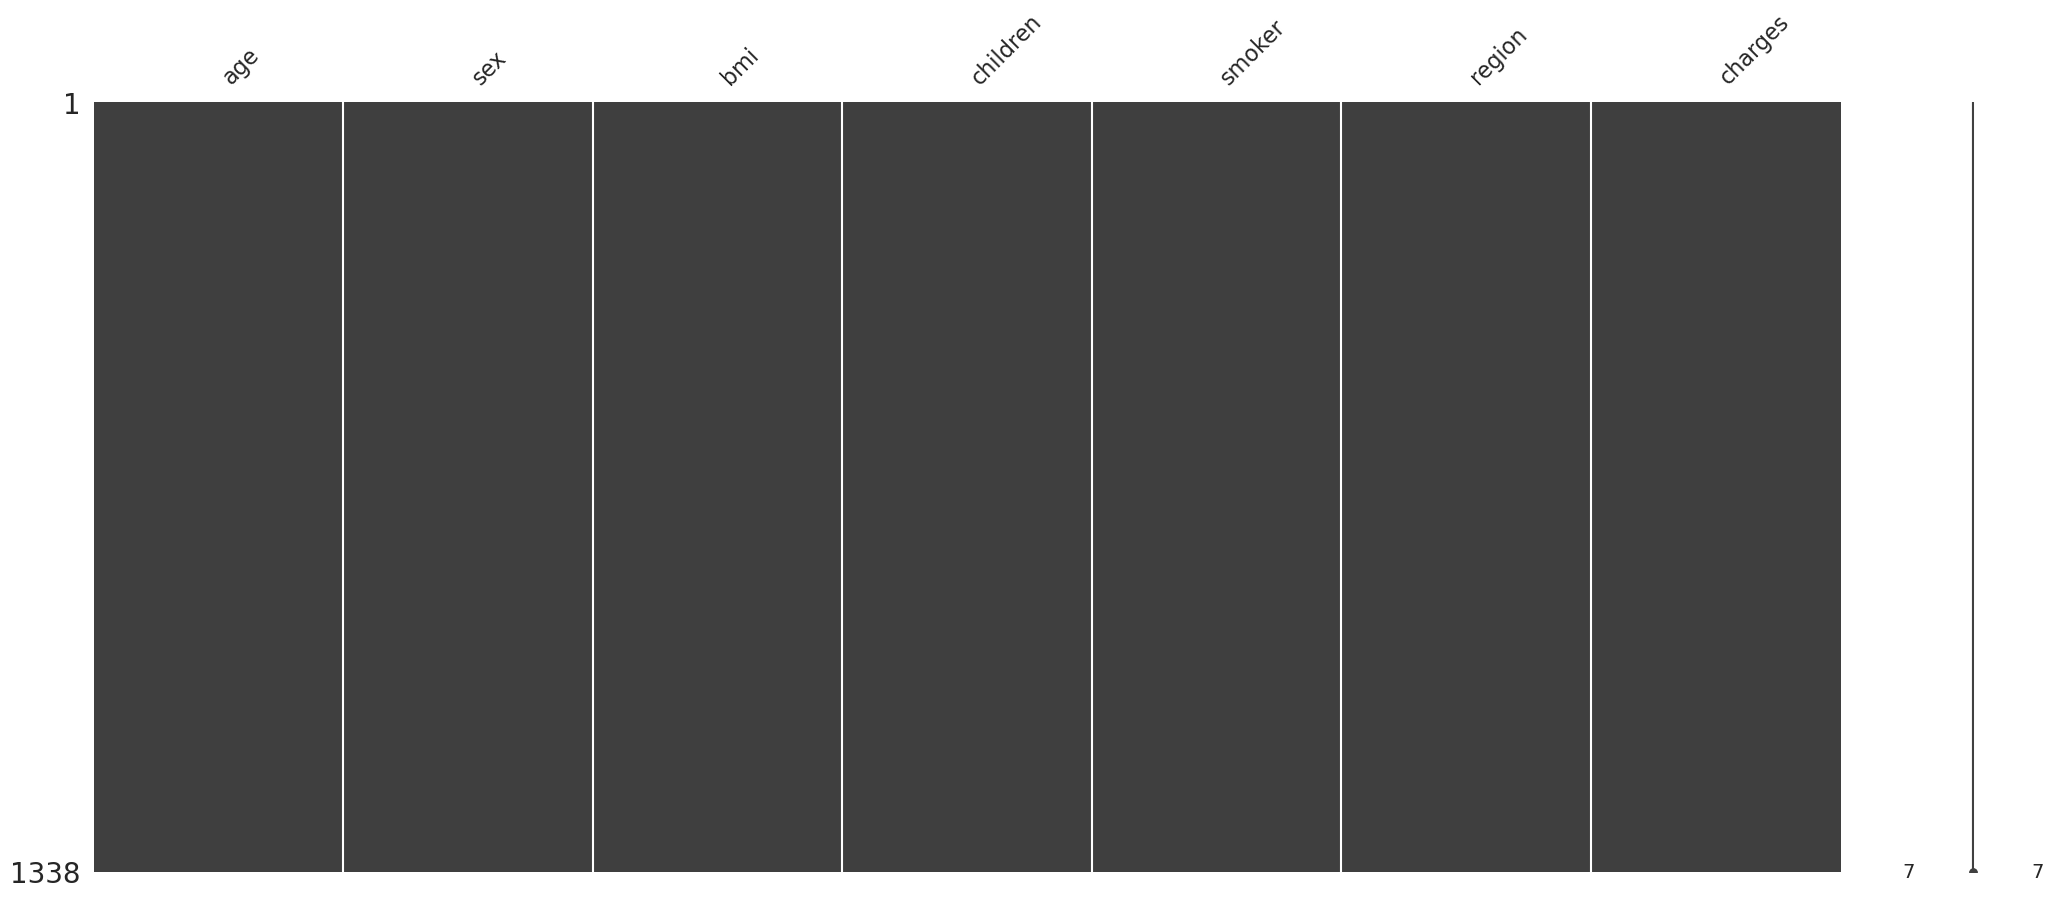

In [40]:
msno.matrix(df)

In [41]:
df.loc[df.duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [42]:
df.drop_duplicates(inplace=True)

Est-ce qu’il y a des valeurs aberrantes ?

In [43]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [44]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [45]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [46]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [47]:
df.to_csv("dataset_clear.csv",index=False)

Analyse univariée de chaque variable.

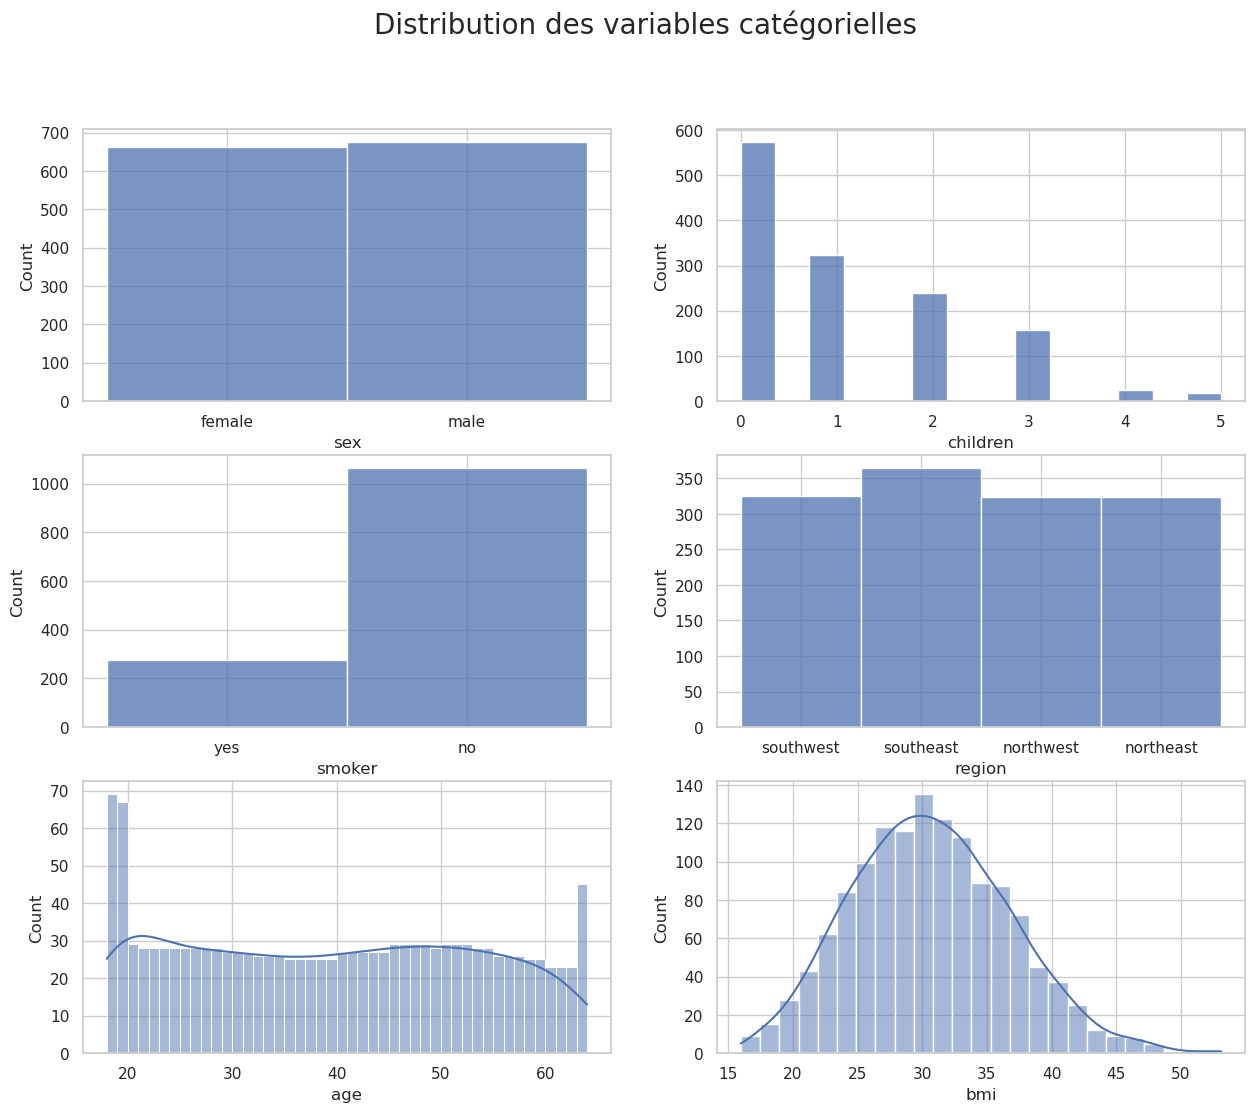

In [48]:
fig, ax = plt.subplots(3,2, figsize=(15, 12))
plt.suptitle('Distribution des variables catégorielles', fontsize=20)
sns.histplot(ax=ax[0,0],x='sex',data=df)
sns.histplot(ax=ax[0,1],x='children',data=df)
sns.histplot(ax=ax[1,0],x='smoker',data=df)
sns.histplot(ax=ax[1,1],x='region',data=df)
sns.histplot(ax=ax[2,0],x='age',data=df,binwidth=1,kde=True)
sns.histplot(ax=ax[2,1],x='bmi',data=df,kde=True)
plt.show()

In [49]:
df['bmi'].skew()

0.28391419385321137

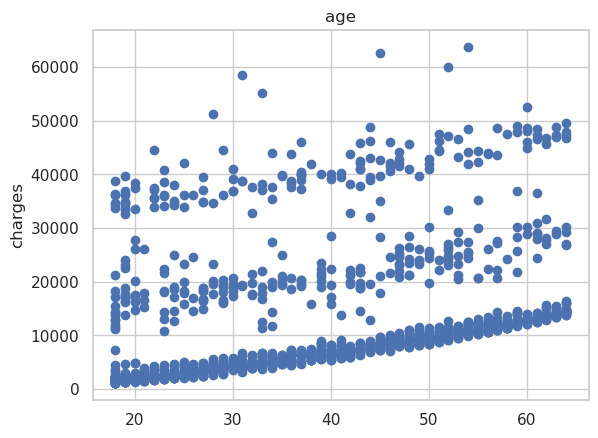

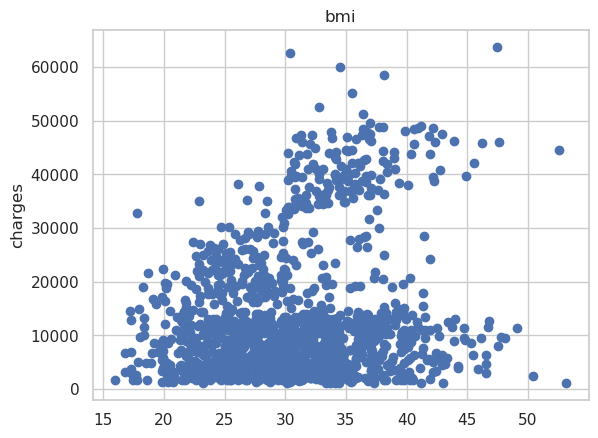

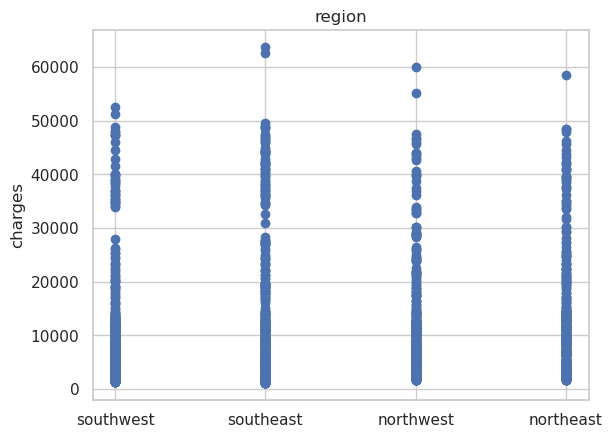

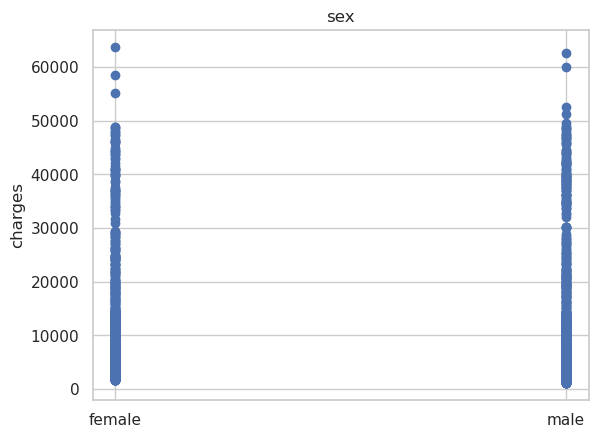

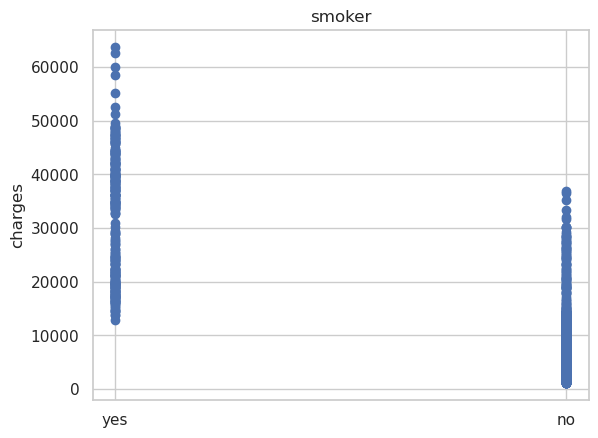

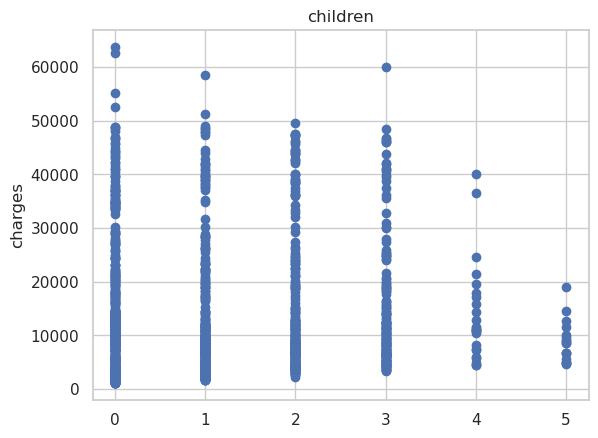

In [50]:
for column in ["age","bmi","region","sex","smoker","children"] :
    plt.scatter(df[column],df["charges"])
    # plt.yscale('log')
    plt.ylabel("charges")
    plt.title(column)
    plt.show()

Étudier la corrélation des variables avec la variable cible

In [51]:
df[["age","bmi","children","charges"]].corr()['charges'].sort_values(ascending=False)

charges     1.000000
age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64

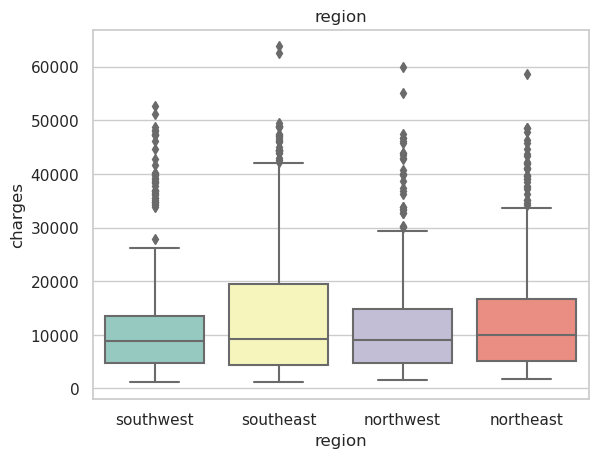

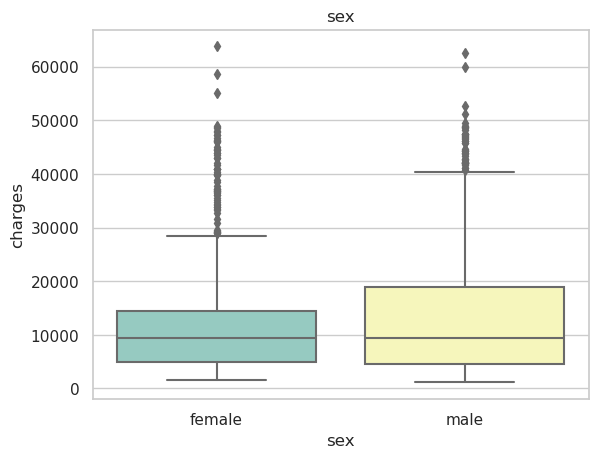

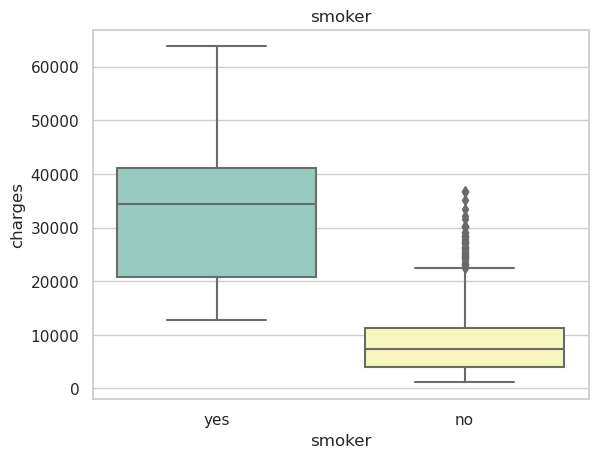

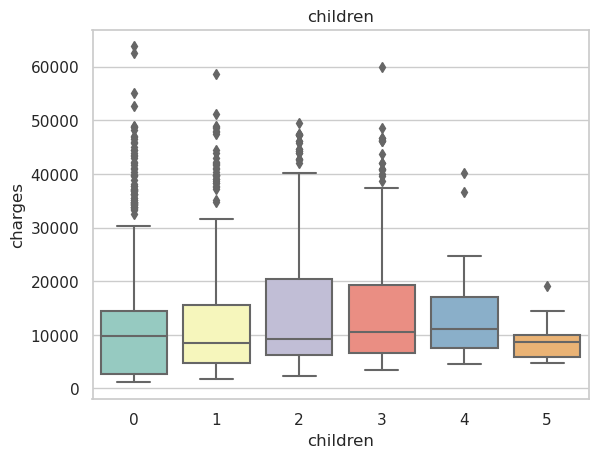

In [52]:
for column in ["region","sex","smoker","children"] :

    sns.set(style="whitegrid")
    sns.boxplot(x=column, y="charges", data=df, palette="Set3")
    plt.ylabel("charges")
    plt.title(column)
    plt.show()

In [53]:
# Création d'un DataFrame pandas avec les données


liste_df = []
for i in range(0,df["children"].max()+1):
    liste_df.append(df[df["children"]==i]["charges"])



# Réalisation du test ANOVA
f_statistic, p_value = f_oneway(*liste_df)

# Affichage du résultat du test
print(f"F-statistic: {f_statistic:.3f}, p-value: {p_value:.3f}")

F-statistic: 3.269, p-value: 0.006


In [54]:
# Création d'un DataFrame pandas avec les données


liste_df = []
for i in df["region"].unique():
    liste_df.append(df[df["region"]==i]["charges"])



# Réalisation du test ANOVA
f_statistic, p_value = f_oneway(*liste_df)

# Affichage du résultat du test
print(f"F-statistic: {f_statistic:.3f}, p-value: {p_value:.3f}")

F-statistic: 2.926, p-value: 0.033


In [55]:
# Création d'un DataFrame pandas avec les données


liste_df = []
for i in df["sex"].unique():
    liste_df.append(df[df["sex"]==i]["charges"])



# Réalisation du test ANOVA
f_statistic, p_value = f_oneway(*liste_df)

# Affichage du résultat du test
print(f"F-statistic: {f_statistic:.3f}, p-value: {p_value:.3f}")

F-statistic: 4.513, p-value: 0.034


In [56]:
# Création d'un DataFrame pandas avec les données


liste_df = []
for i in df["smoker"].unique():
    liste_df.append(df[df["smoker"]==i]["charges"])



# Réalisation du test ANOVA
f_statistic, p_value = f_oneway(*liste_df)

# Affichage du résultat du test
print(f"F-statistic: {f_statistic:.3f}, p-value: {p_value:.3f}")

F-statistic: 2175.737, p-value: 0.000


In [59]:
anova_variete = smf.ols('charges~smoker', data=df).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2176.
Date:                Wed, 04 Jan 2023   Prob (F-statistic):          1.41e-282
Time:                        16:20:31   Log-Likelihood:                -13820.
No. Observations:                1337   AIC:                         2.764e+04
Df Residuals:                    1335   BIC:                         2.766e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8440.6603    229.137     36.837

In [60]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
smoker,1.214307e+11,1.0,2175.736863,1.406722e-282
Residual,7.450811e+10,1335.0,NaN,NaN


In [61]:
anova_variete = smf.ols('charges~children', data=df).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     6.090
Date:                Wed, 04 Jan 2023   Prob (F-statistic):             0.0137
Time:                        16:26:06   Log-Likelihood:                -14464.
No. Observations:                1337   AIC:                         2.893e+04
Df Residuals:                    1335   BIC:                         2.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.254e+04    446.786     28.061      0.0

,sum_sq,df,F,PR(>F)
children,8.898219e+08,1.0,6.090326,0.013717
Residual,1.950490e+11,1335.0,NaN,NaN


Effectuer des analyse bivariées

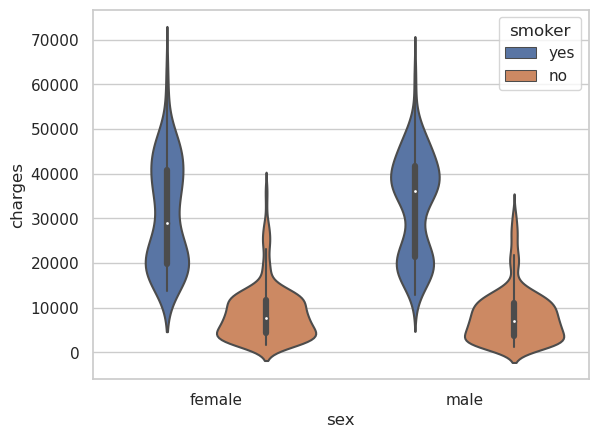

In [ ]:
sns.set(style="whitegrid")
sns.violinplot(x="sex", y="charges", hue="smoker", data=df)
plt.show()

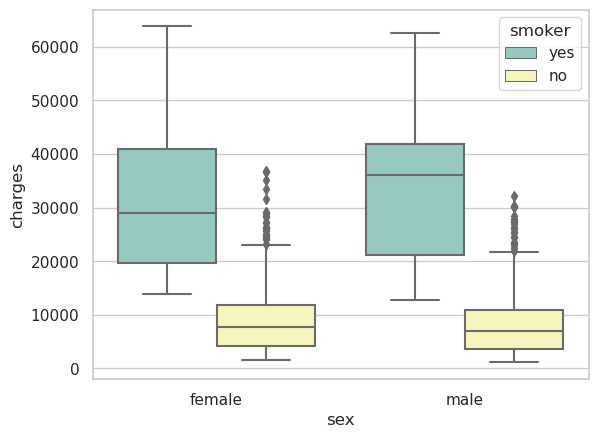

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x="sex", y="charges", hue="smoker", data=df, palette="Set3")
plt.show()

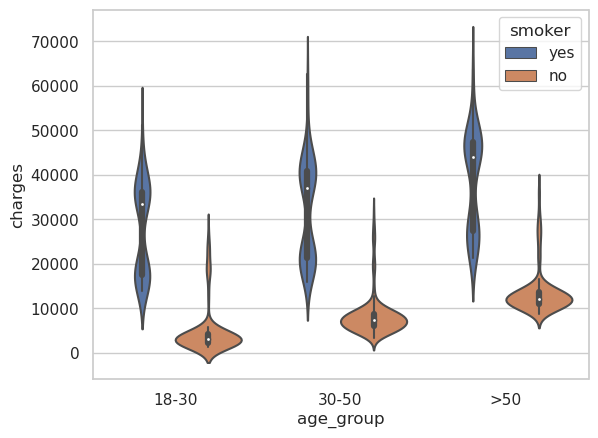

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[18,30,50,df['age'].max()], labels=['18-30','30-50','>50'])
sns.set(style="whitegrid")
sns.violinplot(x="age_group", y="charges", hue="smoker", data=df)
plt.show()

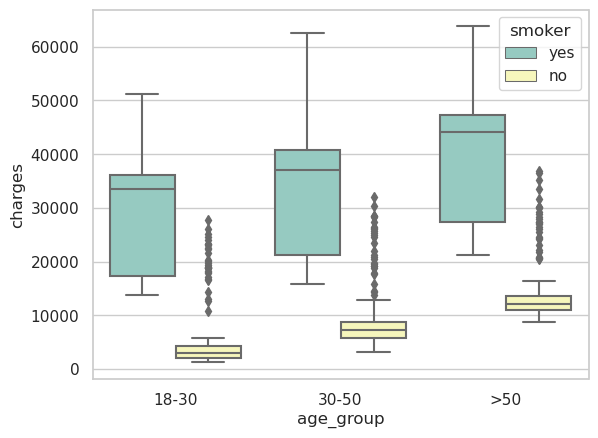

In [ ]:
sns.boxplot(x="age_group", y="charges", hue="smoker", data=df, palette="Set3")
plt.show()

In [ ]:
contingency_table = pd.crosstab(df['sex'], df['smoker'],values=df['charges'],aggfunc='median')

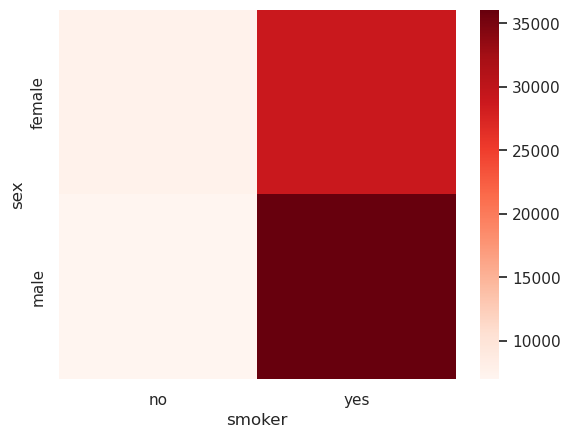

In [ ]:
# Création du heatmap
sns.heatmap(contingency_table, cmap='Reds')

# Affichage du heatmap
plt.show()

In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"chi2: {chi2:.3f}, p-value: {p:.3f}")

chi2: 286.142, p-value: 0.000


In [ ]:
contingency_table = pd.crosstab(df['age_group'], df['smoker'],values=df['charges'],aggfunc='median')

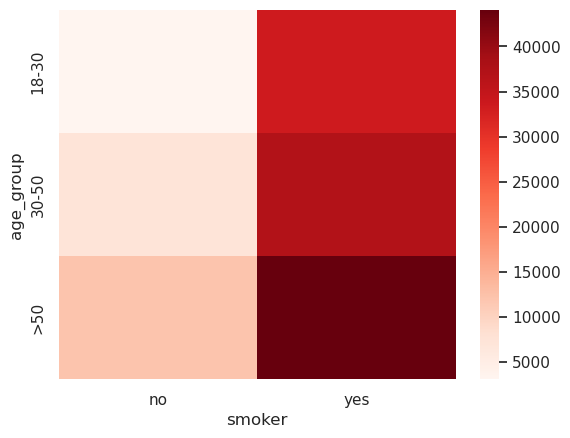

In [ ]:
# Création du heatmap
sns.heatmap(contingency_table, cmap='Reds')

# Affichage du heatmap
plt.show()

In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"chi2: {chi2:.3f}, p-value: {p:.3f}")

chi2: 2842.541, p-value: 0.000


In [64]:
anova_variete = smf.ols('charges~sex*smoker', data=df).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     731.9
Date:                Wed, 04 Jan 2023   Prob (F-statistic):          3.80e-281
Time:                        16:34:31   Log-Likelihood:                -13816.
No. Observations:                1337   AIC:                         2.764e+04
Df Residuals:                    1333   BIC:                         2.766e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,6.601500e+08,6.601500e+08,11.888584,5.823874e-04
smoker,1.0,1.207716e+11,1.207716e+11,2174.965023,2.306818e-282
sex:smoker,1.0,4.882006e+08,4.882006e+08,8.791961,3.079412e-03
Residual,1333.0,7.401890e+10,5.552806e+07,NaN,NaN
